# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

### Изучение данных

Импорт библиотек

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, make_scorer, mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [2]:
pd.options.display.max_columns = 60

В описании проекта указано что данные индексируются датой и временем получения информации (признак date). Соседние по времени параметры часто похожи.

Следовательно при чтении **.csv** файла за индексы можно взять колонку **'date'**

А информация про похожие значения в соседних по времени ячейках можно будет использовать при заполнении пропусков

Сохраним данные в переменные. Для обучающей выборки создадим копию **train_buffer**

In [3]:
full = pd.read_csv('/datasets/gold_recovery_full_new.csv', index_col='date')
train = pd.read_csv('/datasets/gold_recovery_train_new.csv', index_col='date')
test = pd.read_csv('/datasets/gold_recovery_test_new.csv', index_col='date')

train_buffer = pd.read_csv('/datasets/gold_recovery_train_new.csv', index_col='date')

In [4]:
for data in [full, train, test]:
    display(data.head())
    print(data.info())

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,...,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,...,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,10.296251,7.25,1.002663,8.558743,10.497069,19.369147,34.118526,16.250511,3.049646,6.733907,2.353017,1576.166671,-500.904965,1575.950626,-499.865889,1575.994189,-499.315107,1574.479259,-498.931665,42050.861809,...,1600.479580,-449.830646,1600.527589,-449.953649,1399.227084,-450.869848,1399.719514,-450.119001,14.265474,4.592547,9.001494,2.488248,25.880539,-499.989656,23.889530,-500.372428,23.970550,-500.085473,22.085714,-499.446897,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,11.316280,7.25,0.991265,8.603505,10.354494,19.167579,33.969464,16.491823,3.124664,6.471768,2.416800,1601.556163,-499.997791,1600.386685,-500.607762,1602.003542,-500.870069,1599.541515,-499.827444,42018.101184,...,1599.672797,-449.954491,1599.849325,-449.954185,1399.180945,-449.937588,1400.316682,-450.527147,14.115662,4.624775,8.842896,2.458187,26.005

<class 'pandas.core.frame.DataFrame'>
Index: 19439 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         19438 non-null  float64
 1   final.output.concentrate_pb                         19438 non-null  float64
 2   final.output.concentrate_sol                        19228 non-null  float64
 3   final.output.concentrate_au                         19439 non-null  float64
 4   final.output.recovery                               19439 non-null  float64
 5   final.output.tail_ag                                19438 non-null  float64
 6   final.output.tail_pb                                19338 non-null  float64
 7   final.output.tail_sol                               19433 non-null  float64
 8   final.output.tail_au                             

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,...,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,...,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,10.296251,7.25,1.002663,8.558743,10.497069,19.369147,34.118526,16.250511,3.049646,6.733907,2.353017,1576.166671,-500.904965,1575.950626,-499.865889,1575.994189,-499.315107,1574.479259,-498.931665,42050.861809,...,1600.479580,-449.830646,1600.527589,-449.953649,1399.227084,-450.869848,1399.719514,-450.119001,14.265474,4.592547,9.001494,2.488248,25.880539,-499.989656,23.889530,-500.372428,23.970550,-500.085473,22.085714,-499.446897,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,11.316280,7.25,0.991265,8.603505,10.354494,19.167579,33.969464,16.491823,3.124664,6.471768,2.416800,1601.556163,-499.997791,1600.386685,-500.607762,1602.003542,-500.870069,1599.541515,-499.827444,42018.101184,...,1599.672797,-449.954491,1599.849325,-449.954185,1399.180945,-449.937588,1400.316682,-450.527147,14.115662,4.624775,8.842896,2.458187,26.005

<class 'pandas.core.frame.DataFrame'>
Index: 14149 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         14148 non-null  float64
 1   final.output.concentrate_pb                         14148 non-null  float64
 2   final.output.concentrate_sol                        13938 non-null  float64
 3   final.output.concentrate_au                         14149 non-null  float64
 4   final.output.recovery                               14149 non-null  float64
 5   final.output.tail_ag                                14149 non-null  float64
 6   final.output.tail_pb                                14049 non-null  float64
 7   final.output.tail_sol                               14144 non-null  float64
 8   final.output.tail_au                             

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,1399.001695,-499.485144,13.128569,5.636710,489.793655,62.710452,42.022440,12.084103,16.922877,6.153479,16.867518,6.150709,1001.849317,-350.301265,1249.738612,-399.107531,1249.750520,-399.396730,1198.287855,-399.488594,999.472250,-399.530962,949.566189,-398.180807,24.938200,-500.490963,14.947607,-500.013837,20.018166,-450.395995,13.987058,-449.831513,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,1399.508091,-500.416324,13.036280,5.526065,490.104534,61.961163,41.187903,11.918977,17.002532,5.999043,16.996063,6.002315,998.690785,-350.425704,1248.395457,-399.946025,1249.514451,-399.630810,1200.506459,-399.942434,1000.002114,-399.491528,950.200009,-405.787514,24.923466,-499.813963,14.930873,-500.764452,19.988503,-450.114024,14.092981,-450.059163,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,1399.497088,-499.715479,13.138412,5.426561,489.617969,66.903807,42.546294,12.091332,16.992520,5.850632,16.982096,5.853594,998.516720,-349.783538,1247.440748,-400.264330,1248.207204,-401.074405,1199.770026,-400.790582,999.925519,-399.236999,950.320481,-400.864340,24.908732,-500.304035,14.996511,-500.993821,20.039689,-450.263164,14.077881,-449.660997,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,1401.065165,-501.038738,12.400507,5.114758,476.618130,59.865919,41.060195,12.181597,16.532144,5.801935,16.515277,5.803657,1000.276604,-350.172597,1251.322675,-398.655289

<class 'pandas.core.frame.DataFrame'>
Index: 5290 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 52 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               5286 non-null   float64
 1   primary_cleaner.input.depressant            5285 non-null   float64
 2   primary_cleaner.input.feed_size             5290 non-null   float64
 3   primary_cleaner.input.xanthate              5286 non-null   float64
 4   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 5   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 6   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 8   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_level    5290 non-null

Первое что бросается в глаза это разница в количестве колонок 

В исходных данных и обучающей выборке по 87 колонок, а в тестовой 53 

Найдем колонки которые не попали в тестовую выборку 

In [5]:
missing_columns = []

for column in full.columns:
    if column not in test.columns:
        missing_columns.append(column)
        
missing_columns

['final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'final.output.tail_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'primary_cleaner.output.tail_au',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.au_pb_ratio',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.concentrate_au',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_pb',
 'rougher.output.ta

При дальнейшем анализе более подробно рассмотрим отсутствующие колонки в тестовой выборке (в случае необходимости их можно будет восстановить из исходных данных **gold_recovery_full_new.csv**)

Вызовем **.describe** для выявления аномальных значений 

In [6]:
full.describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,...,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,19438.000000,19438.000000,19228.000000,19439.000000,19439.000000,19438.000000,19338.000000,19433.000000,19439.000000,19415.000000,19402.000000,19439.000000,19335.000000,19439.000000,19323.000000,19069.000000,19439.000000,19435.000000,19418.000000,19377.000000,19439.000000,1.943500e+04,19438.000000,1.943500e+04,19438.000000,1.943700e+04,19438.000000,1.943600e+04,19438.000000,1.943700e+04,...,19438.000000,19438.000000,19439.000000,19439.000000,19003.000000,19439.000000,19439.000000,19439.000000,19437.000000,19427.000000,17691.000000,19439.000000,19219.000000,19438.000000,19416.000000,19438.000000,19426.000000,19438.000000,19438.000000,19438.000000,19433.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19437.000000,19438.000000
mean,5.168470,9.978895,9.501224,44.076513,67.050208,9.688589,2.705795,10.583728,3.042467,144.624774,8.817039,7.307078,1.021795,8.442408,9.829530,10.489499,32.119400,16.145826,3.435656,7.973209,3.914179,1.589354e+03,-491.195012,1.591344e+03,-492.192978,1.586669e+03,-491.980070,1.542912e+03,-488.017382,4.217119e+04,...,1299.968799,-467.716946,1211.563299,-468.239912,1080.869685,-466.037742,1025.274256,-466.265327,14.586833,5.777703,7.167247,4.339625,28.705564,-502.367331,24.106800,-503.230712,28.199338,-486.203350,22.200645,-493.742107,18.987674,-485.894516,15.010366,-461.078636,15.694452,-488.684065,12.198224,-487.149827,18.959024,-505.436305
std,1.372348,1.669240,2.787537,5.129784,10.125840,2.328642,0.949077,2.868782,0.922808,44.464071,3.286186,0.613509,0.513254,2.054465,2.556843,3.909639,5.627611,3.548598,1.392536,2.212677,1.593034,1.289968e+02,32.431842,1.318109e+02,33.794822,1.361114e+02,32.711455,2.461996e+02,43.959780,3.243621e+05,...,202.804325,53.534825,204.019326,53.921458,172.149992,57.384424,164.487837,57.850263,4.265202,2.774598,3.9160

Файлы записаны в переменные. Отсутствующие в тестовой выборке колонки сохранены в переменную **missing_columns**. В данных имеются пропуски (в описании проекта говорится о том что некоторые данные отсутствуют в связи с тем что замеряются/рассчитываются позднее). Типы данных в колонках соответствуют содержимому.

Приступаем к следующему шагу

### Расчет эффективности обогащения

В описании технологического процесса имеется формула для расчета эффективности обогащения.

Выглядит она следующим образом: 

**Recovery = C * (F-T) / F * (C-T) * 100%**

где:
- C — доля золота в концентрате после флотации/очистки;
- F — доля золота в сырье/концентрате до флотации/очистки;
- T — доля золота в отвальных хвостах после флотации/очистки.

Проверим правильность рассчета эффективности обогащения.

Сохраним нужные значения в переменные: **C, F, T** 

In [7]:
C = train['rougher.output.concentrate_au']
F = train['rougher.input.feed_au']
T = train['rougher.output.tail_au']

Посчитаем **Recovery** по формуле 

In [8]:
recovery = (C * (F - T)) / (F * (C - T)) * 100
recovery

date
2016-01-15 00:00:00    87.107763
2016-01-15 01:00:00    86.843261
2016-01-15 02:00:00    86.842308
2016-01-15 03:00:00    87.226430
2016-01-15 04:00:00    86.688794
                         ...    
2018-08-18 06:59:59    89.574376
2018-08-18 07:59:59    87.724007
2018-08-18 08:59:59    88.890579
2018-08-18 09:59:59    89.858126
2018-08-18 10:59:59    89.514960
Length: 14149, dtype: float64

Найдем **MAE** между имеющимися данными и нашими рассчетами  

In [9]:
mean_absolute_error(recovery, train['rougher.output.recovery'])

9.73512347450521e-15

Значение **MAE** близка к 0. Посчитанные и исходные значения почти не отличаются. Данные по обогащению корректны

### Анализ признаков

Отсутствующие признаки в тестовой выборке сохранены в переменной **missing_columns**. Взглянем на них еще раз

In [10]:
missing_columns

['final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'final.output.tail_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'primary_cleaner.output.tail_au',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.au_pb_ratio',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.concentrate_au',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_pb',
 'rougher.output.ta

В тестовой выборке отсутствуют выходные (output) и расчетные (calculation) характеристики. Их нельзя использовать при обучении, так как они еще не будут доступны к моменту начала процесса и два целевых признака **'rougher.output.recovery', 'final.output.recovery'**

Удалим из пропущенных признаков два целевых признака

In [11]:
try:
    missing_columns.remove('final.output.recovery')
    missing_columns.remove('rougher.output.recovery')
except:
    print('Уже удалены')

Удалим отсутствующие данные из обучающей выборки

In [12]:
train = train.drop(missing_columns, axis=1)

### Предобработка данных

Проверим количество пропусков в тестовой и обучающей выборках

In [13]:
train.isna().sum().sort_values(ascending=False).tail(20)

secondary_cleaner.state.floatbank6_a_level    1
rougher.state.floatbank10_a_air               1
primary_cleaner.state.floatbank8_a_level      1
primary_cleaner.state.floatbank8_b_level      1
rougher.state.floatbank10_c_level             1
rougher.state.floatbank10_c_air               1
rougher.state.floatbank10_b_air               1
rougher.state.floatbank10_a_level             1
primary_cleaner.state.floatbank8_c_level      1
primary_cleaner.state.floatbank8_d_level      1
rougher.input.feed_ag                         0
primary_cleaner.input.feed_size               0
rougher.state.floatbank10_f_level             0
rougher.input.feed_au                         0
rougher.output.recovery                       0
rougher.state.floatbank10_f_air               0
rougher.state.floatbank10_d_air               0
rougher.state.floatbank10_d_level             0
rougher.state.floatbank10_e_level             0
final.output.recovery                         0
dtype: int64

In [14]:
test.isna().sum().sort_values(ascending=False)

rougher.input.floatbank11_xanthate            25
rougher.input.feed_sol                        21
secondary_cleaner.state.floatbank3_a_air       9
rougher.input.floatbank11_sulfate              8
primary_cleaner.input.depressant               5
rougher.input.floatbank10_sulfate              5
primary_cleaner.input.sulfate                  4
primary_cleaner.input.xanthate                 4
rougher.input.feed_rate                        3
secondary_cleaner.state.floatbank2_a_air       3
secondary_cleaner.state.floatbank2_b_air       2
rougher.input.feed_size                        1
secondary_cleaner.state.floatbank3_b_level     0
secondary_cleaner.state.floatbank3_b_air       0
rougher.state.floatbank10_f_air                0
rougher.state.floatbank10_f_level              0
secondary_cleaner.state.floatbank6_a_air       0
secondary_cleaner.state.floatbank5_b_level     0
secondary_cleaner.state.floatbank2_a_level     0
secondary_cleaner.state.floatbank5_b_air       0
secondary_cleaner.st

В целевых признаках **rougher.output.recovery** **final.output.recovery** отсутствуют пропуски

В описании проекта указано что соседние по времени параметры схожи. В таком случае пропуски можно заполнить значениями идущими за пропуском

In [15]:
train = train.fillna(method='ffill')
test = test.fillna(method='ffill')

train_buffer = train_buffer.fillna(method='ffill')

Данные изучены. Рассчитана эффективность обогащения по формуле. Проанализированы отсутствующие признаки в тестовой выборке и сохранены в переменной **missing_columns**. 

Приступаем к анализу данных

## Анализ данных

###  Концентрация металлов на различных этапах очистки

Сохраним среднее значение концентрации каждого металла на каждом этапе очистки

In [16]:
au_rougher = train_buffer['rougher.output.concentrate_au'].mean()
au_primary_cleaner = train_buffer['primary_cleaner.output.concentrate_au'].mean()
au_final = train_buffer['final.output.concentrate_au'].mean()

In [17]:
ag_rougher = train_buffer['rougher.output.concentrate_ag'].mean()
ag_primary_cleaner = train_buffer['primary_cleaner.output.concentrate_ag'].mean()
ag_final = train_buffer['final.output.concentrate_ag'].mean()

In [18]:
pb_rougher = train_buffer['rougher.output.concentrate_pb'].mean()
pb_primary_cleaner = train_buffer['primary_cleaner.output.concentrate_pb'].mean()
pb_final = train_buffer['final.output.concentrate_pb'].mean()

In [19]:
# средние значения концентрации металлов по этапам 
metals = [[au_rougher, au_primary_cleaner, au_final],
         [ag_rougher, ag_primary_cleaner, ag_final],
         [pb_rougher, pb_primary_cleaner, pb_final]]

# наименование этапов для графика 
stages = ['rougher', 'primary_cleaner', 'final']

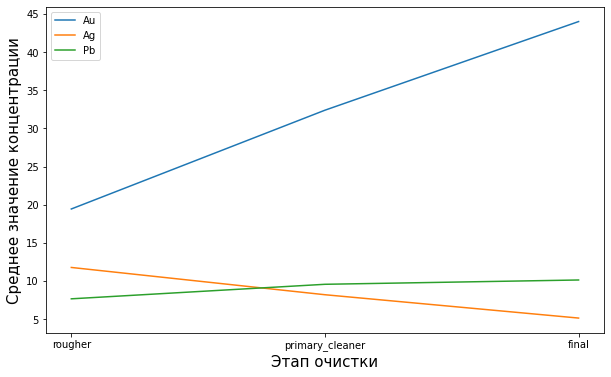

In [20]:
f, axes = plt.subplots(1, 1, figsize=(10, 6))
axes.set_ylabel('Среднее значение концентрации', fontsize=15)
axes.set_xlabel('Этап очистки', fontsize=15)

for metal, label in zip(metals, ['Au', 'Ag', 'Pb']):
    sns.lineplot(x=stages, y=metal, legend='full', label=label)


По построенному графику видно что:
- концентрация золота растет на каждом последующем этапе
- концентрация серебра наоборот снижается
- концентрация свинца немного растет

### Сравнение распределения размеров гранул сырья

За размер гранул сырья отвечает параметр **feed_size**

Для сравнения распределения построим гистограммы

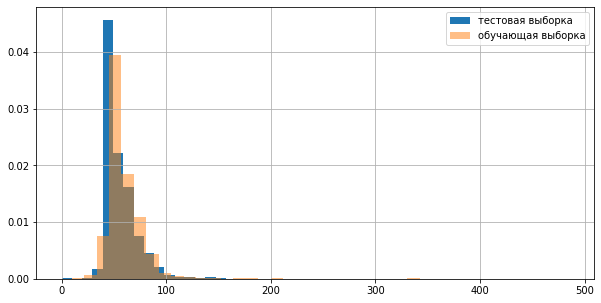

In [21]:
test['rougher.input.feed_size'].hist(figsize=(10, 5), bins=40, density=True)
train['rougher.input.feed_size'].hist(figsize=(10, 5), bins=40, alpha=0.5, density=True)
plt.legend(['тестовая выборка', 'обучающая выборка']);

Распределение размеров гранул сырья не сильно отличаются. Оценки модели должны быть корректны

###  Суммарная концентрация всех веществ на разных стадиях

Сохраним в новых столбцах суммарную концентрацию веществ по этапам

In [22]:
train['feed'] = train_buffer['rougher.input.feed_ag'] + train_buffer['rougher.input.feed_pb'] +\
            train_buffer['rougher.input.feed_sol'] + train_buffer['rougher.input.feed_au']
train['rougher'] = train_buffer['rougher.output.concentrate_ag'] + train_buffer['rougher.output.concentrate_pb'] +\
            train_buffer['rougher.output.concentrate_sol'] + train_buffer['rougher.output.concentrate_au']
train['final'] = train_buffer['final.output.concentrate_ag'] + train_buffer['final.output.concentrate_pb'] +\
            train_buffer['final.output.concentrate_sol'] + train_buffer['final.output.concentrate_au']

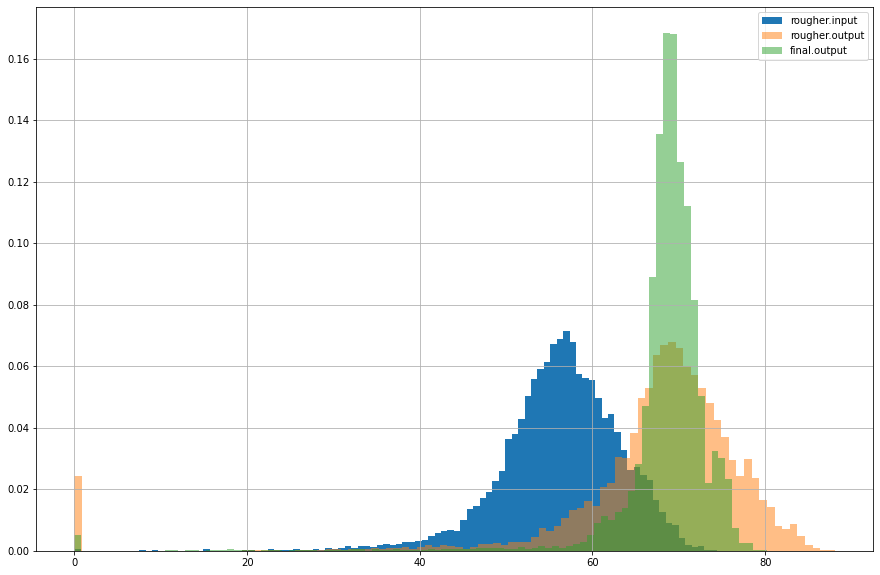

In [23]:
train['feed'].hist(figsize=(15, 10), bins=100, density=True)
train['rougher'].hist(figsize=(15, 10), bins=100, alpha=0.5, density=True)
train['final'].hist(figsize=(15, 10), bins=100, alpha=0.5, density=True)
plt.legend(['rougher.input', 'rougher.output', 'final.output']);

На графике видны аномалии где суммарная концентрация сырья на разных этапах близка к 0. Удалим данные аномалии

In [24]:
train = train[train['feed'] > 10]
train = train[train['rougher'] > 10]
train = train[train['final'] > 10]
train.shape

(13783, 57)

Так же удалим столбцы с суммарной концентрацией

In [25]:
train = train.drop(['feed', 'rougher', 'final'], axis=1)

При анализе данных мы рассмотрели:
- Концентрацию металлов на разных этапах очистки. На графике заметили что средняя концентрация золота на каждом последующем этапе растет
- Сравнили распределение размеров гранул сырья на обучающей и тестовой выборке. Распределения не сильно отличались
- При оценке суммарной концентрации всех веществ на разных этапах наткнулись на аномалию. Были нулевые значения показателей концентрации. Данные были очищены от аномальных значений

## Модель

### Создание функции для оценки качества sMAPE

In [26]:
def smape(target, predict):
    return 1 / len(target) * sum( abs(target - predict) / ( (abs(target) + abs(predict)) * 0.5) ) * 100

In [27]:
def final_smape(smape_r, smape_f):
    return 0.25 * smape_r + 0.75 * smape_f

### Обучение модели

Разделение на признаки и целевые признаки

In [28]:
f_train = train.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)
t_rougher_train = train['rougher.output.recovery']
t_final_train = train['final.output.recovery']

Проведем масштабирование признаков обучающей и тестовой выборок с помощью **StandardScaler**

In [29]:
scaler_train = StandardScaler()

scaler_train.fit(f_train)

f_train_scale = scaler_train.transform(f_train)
test_scale = scaler_train.transform(test)

Обучим две модели для предсказания двух целевых признаков с помощью **LinearRegression**

В параметр **scoring** передадим **make_scorer(smape)** чтобы результатами оценки кросс-валидации была наша функция **smape** 

In [30]:
model_r = LinearRegression()
model_f = LinearRegression()

scorer = make_scorer(smape, greater_is_better=False)

smape_r = cross_val_score(model_r, f_train_scale, t_rougher_train, cv=5, scoring = scorer)
smape_f = cross_val_score(model_f, f_train_scale, t_final_train, cv=5, scoring = scorer)

smape_r_mean = sum(smape_r) / len(smape_r) 
smape_f_mean = sum(smape_f) / len(smape_f)

In [31]:
print(f'sMAPE rougher{smape_r_mean:.2f} %')
print(f'sMAPE final{smape_f_mean:.2f} %')
print(f'Финальный sMAPE{final_smape(smape_r_mean, smape_f_mean):.2f} %')

sMAPE rougher-7.23 %
sMAPE final-10.96 %
Финальный sMAPE-10.03 %


Линейная регрессия дала результат 10.03 % в финальном sMAPE.

Попробуем подобрать параметры для модели **RandomForestRegressor**

Также как и с линейной регрессией обучать будем две модели для двух целевых признаков.
С помощью **GridSearchCV** подберем параметры для моделей

Модель для **rougher**

In [32]:
model = RandomForestRegressor(random_state=333)

param_grid = { 
    'n_estimators': [1, 3, 4],
    'max_depth' : [1, 2, 3]
}

grid_r = GridSearchCV(model, param_grid, scoring=scorer, cv=3)
grid_r.fit(f_train_scale, t_rougher_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=333),
             param_grid={'max_depth': [1, 2, 3], 'n_estimators': [1, 3, 4]},
             scoring=make_scorer(smape, greater_is_better=False))

In [33]:
final_model = grid_r.best_estimator_
final_model

RandomForestRegressor(max_depth=2, n_estimators=1, random_state=333)

По результатам подбора параметров с помощью **GridSearchCV** лучшей для этапа **rougher** стала модель с гиперпараметрами - **RandomForestRegressor(max_depth=2, n_estimators=1, random_state=333)**

Модель для **final**

In [34]:
model_2 = RandomForestRegressor(random_state=333)

grid_f = GridSearchCV(model_2, param_grid, scoring=scorer, cv=3)
grid_f.fit(f_train_scale, t_final_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=333),
             param_grid={'max_depth': [1, 2, 3], 'n_estimators': [1, 3, 4]},
             scoring=make_scorer(smape, greater_is_better=False))

In [35]:
final_model_2 = grid_f.best_estimator_
final_model_2

RandomForestRegressor(max_depth=2, n_estimators=3, random_state=333)

Для этапа **final** лучшая модель - **RandomForestRegressor(max_depth=2, n_estimators=3, random_state=333)**

Посчитаем **sMAPE**

In [36]:
smape_random_forest_r_score = cross_val_score(final_model, f_train_scale, t_rougher_train, cv=5, scoring = scorer)
smape_random_forest_f_score = cross_val_score(final_model_2, f_train_scale, t_final_train, cv=5, scoring = scorer)

In [37]:
smape_random_forest_r = sum(smape_random_forest_r_score * (-1)) / len(smape_random_forest_r_score)
print(f'sMAPE rougher модели RandomForestRegressor: {smape_random_forest_r:.2f} %')

smape_random_forest_f = sum(smape_random_forest_f_score * (-1)) / len(smape_random_forest_f_score)
print(f'sMAPE final модели RandomForestRegressor: {smape_random_forest_f:.2f} %')

print(f'Итоговый sMAPE модели RandomForestRegressor:{final_smape(smape_random_forest_r, smape_random_forest_f):.2f} %')

sMAPE rougher модели RandomForestRegressor: 7.13 %
sMAPE final модели RandomForestRegressor: 9.51 %
Итоговый sMAPE модели RandomForestRegressor:8.92 %


У RandomForestRegressor итоговый sMAPE оказался лучше чем у линейной регрессии
- 8.92% у RandomForestRegressor
- 10.03% у LinearRegression

Для итоговой проверки на тестовой выборке будем использовать Лучшую модель - **RandomForestRegressor.**

In [38]:
final_model.fit(f_train_scale, t_rougher_train)
final_model_2.fit(f_train_scale, t_final_train)

RandomForestRegressor(max_depth=2, n_estimators=3, random_state=333)

In [39]:
test_target_r = pd.Series(full['rougher.output.recovery'], index=test.index)
test_target_f = pd.Series(full['final.output.recovery'], index=test.index)

In [40]:
predict_r = final_model.predict(test_scale)
predict_f = final_model_2.predict(test_scale)

In [41]:
print(f'sMAPE rougher для тестовой выборки: {smape(test_target_r, predict_r):.2f} %')
print(f'sMAPE final для тестовой выборки: {smape(test_target_f, predict_f):.2f} %')
print(f'Итоговый sMAPE для тестовой выборки: {final_smape(smape(test_target_r, predict_r), smape(test_target_f, predict_f)):.2f} %')

sMAPE rougher для тестовой выборки: 8.47 %
sMAPE final для тестовой выборки: 9.30 %
Итоговый sMAPE для тестовой выборки: 9.09 %


Сравним результаты с константной моделью 

Создадим константную модель, которая предсказывает средние значения целевого признака и посчитаем sMAPE

In [42]:
predict_const_r = pd.Series(train['rougher.output.recovery'].mean(), index=test_target_r.index)
predict_const_f = pd.Series(train['final.output.recovery'].mean(), index=test_target_f.index)

In [43]:
print(f'Итоговый sMAPE константной модели:{final_smape(smape(test_target_r, predict_const_r), smape(test_target_f, predict_const_f)):.2f} %')


Итоговый sMAPE константной модели:9.83 %


# Вывод

**Подготовка данных**

- Данные загружены и изучены
- Расчет эффективности обогащения произведен верно
- Проанализированы и отброшены признаки
- Пропуски заполнены верно

**Анализ данных**

- Произведен анализ концентрации металлов на этапах очистки
- Сравнение распределения размеров гранул сырья
- Посчитана суммарная концентрация всех веществ на разных стадиях обработки
- Удалены аномальные значения

**Модель**

- Данные разделены на признаки и целевой признак
- Произведено масштабирование данных
- Создана функция для подсчета sMAPE и итоговой sMAPE
- Обучены модели. Две **LinearRegression** и две **RandomForestRegressor** по две на каждый целевой признак
- Отобрана лучшая модель - **RandomForestRegressor**

Лучшая модель дала следующие результаты на обучающей выборке:

- sMAPE rougher модели RandomForestRegressor: 7.13 %
- sMAPE final модели RandomForestRegressor: 9.51 %
- Итоговый sMAPE модели RandomForestRegressor:8.92 %

Модель на тестовой выборке дала следующие результаты:

- sMAPE rougher для тестовой выборки: 8.47 %
- sMAPE final для тестовой выборки: 9.30 %
- **Итоговый sMAPE для тестовой выборки: 9.09 %**

Итоговый sMAPE константной модели:9.83 %